In [7]:
import tensorflow as tf      
import pandas as pd 
import numpy as np

In [8]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [9]:
x_train=x_train.reshape(-1,28,28,1).astype('float32')
x_test=x_test.reshape(-1,28,28,1).astype('float32')
x_train/=255
x_test/=255
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
model=tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=[28,28,1]))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10,activation='softmax'))

/Users/devanshgoyal/.pyenv/versions/3.11.5/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=[x_test,y_test])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8923 - loss: 0.3501 - val_accuracy: 0.9784 - val_loss: 0.0639
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9828 - loss: 0.0580 - val_accuracy: 0.9800 - val_loss: 0.0620
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9877 - loss: 0.0412 - val_accuracy: 0.9887 - val_loss: 0.0350
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9911 - loss: 0.0284 - val_accuracy: 0.9890 - val_loss: 0.0350
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9884 - val_loss: 0.0338
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.9896 - val_loss: 0.0304
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9955 - loss: 0.0130 - val_accuracy: 0.9891 - val_loss: 0.0383
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9967 - loss: 0.0108 

In [14]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
y_pred=model.predict(x_test)
y_test_class=np.argmax(y_test,axis=1)
y_pred_class=np.argmax(y_pred,axis=1)
ac=accuracy_score(y_pred_class,y_test_class)
cr=classification_report(y_pred_class,y_test_class)
f=f1_score(y_pred_class,y_test_class,average='macro')
cm=confusion_matrix(y_pred_class,y_test_class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
print(ac)
print(cr)
print(f)
print(cm)

0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       992
           1       1.00      1.00      1.00      1138
           2       0.99      0.99      0.99      1027
           3       0.99      0.98      0.99      1025
           4       0.99      0.99      0.99       977
           5       0.99      0.98      0.99       898
           6       0.98      1.00      0.99       941
           7       0.99      0.99      0.99      1022
           8       0.99      0.99      0.99       978
           9       0.99      0.99      0.99      1002

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

0.989864387117089
[[ 977    0    2    0    1    1    5    1    3    2]
 [   0 1133    0    0    0    0    2    3    0    0]
 [   0    0 1019    1    0    0    0    5    2    0]
 [   1    2    3 1004    1    7    1    2    1    3]
 [   0

In [16]:
import matplotlib.pyplot as plt
train_loss=history.history['loss']
test_loss=history.history['val_loss']
train_accuracy=history.history['accuracy']
test_accuracy=history.history['val_accuracy']

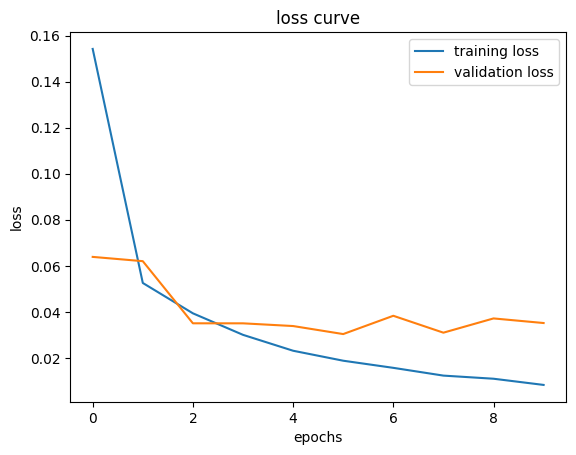

In [17]:
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('loss curve')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

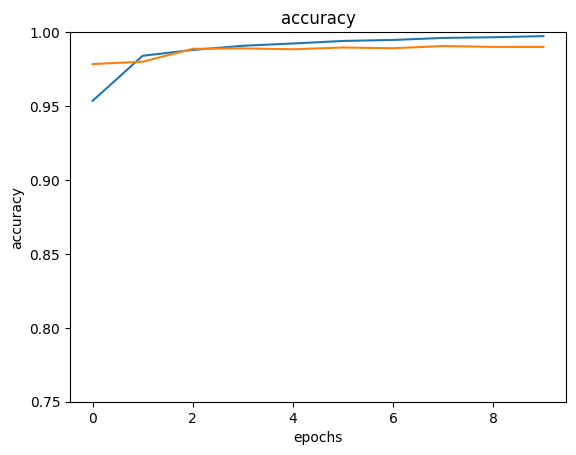

In [18]:
plt.plot(train_accuracy,label='training accuracy')
plt.plot(test_accuracy,label='validation_accuracy')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0.75,1)
plt.show()

In [19]:
model.save('lab1.h5')

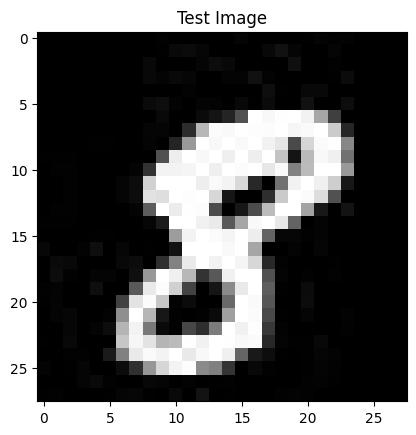

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[7.8976010e-14 1.0939012e-18 3.6888062e-12 3.7281538e-09 3.4266248e-13
  1.7928882e-11 4.1318379e-18 8.8645190e-14 9.9999976e-01 1.9357795e-07]]
Predicted class:  [8]


In [51]:
from PIL import Image
img_path = '/Users/devanshgoyal/DLLABEXAM/img_10.jpg'
import matplotlib.pyplot as plt

img = Image.open(img_path).convert('L')
plt.imshow(img, cmap='gray')
plt.title("Test Image")
plt.show()
img=img.resize((28,28))
img_array = np.array(img)
img_array=img_array.reshape(-1,28,28,1).astype('float32')
img_array /=255
pred = model.predict(img_array)
print(pred)
predicted_class = np.argmax(pred, axis=1)
print("Predicted class: ", predicted_class)